In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import xgboost
import shap


In [2]:
data = pd.read_csv('listings_summary.csv') # orginal berlin

In [3]:
data2 = pd.read_csv('listings_munich_11_2019.csv') # monachium

Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.


In [4]:
data3 = pd.read_csv('listings_praga_11_2019.csv') # praga

Columns (95) have mixed types.Specify dtype option on import or set low_memory=False.


In [5]:
# Print columns
print(len(data))
print(len(data.columns))
print(len(data.shape))
data.columns

22552
96
2


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
#pd.set_option('display.max_rows', None)
print(data.head(10))
print(data.host_response_rate.unique())
print(data.room_type.unique())
print(data.property_type.unique())
print(len(data.amenities))
print(data.guests_included.unique())
print(data.minimum_nights.unique())


      id                         listing_url       scrape_id last_scraped  \
0   2015   https://www.airbnb.com/rooms/2015  20181107122246   2018-11-07   
1   2695   https://www.airbnb.com/rooms/2695  20181107122246   2018-11-07   
2   3176   https://www.airbnb.com/rooms/3176  20181107122246   2018-11-07   
3   3309   https://www.airbnb.com/rooms/3309  20181107122246   2018-11-07   
4   7071   https://www.airbnb.com/rooms/7071  20181107122246   2018-11-07   
5   9991   https://www.airbnb.com/rooms/9991  20181107122246   2018-11-07   
6  14325  https://www.airbnb.com/rooms/14325  20181107122246   2018-11-07   
7  16401  https://www.airbnb.com/rooms/16401  20181107122246   2018-11-07   
8  16644  https://www.airbnb.com/rooms/16644  20181107122246   2018-11-07   
9  17409  https://www.airbnb.com/rooms/17409  20181107122246   2018-11-07   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                Prenzlauer Berg close to 

In [7]:
# Cast price as float
data.price = data.price.apply(lambda x: x.replace("$", ""))
data.price = data.price.apply(lambda x: x.replace(",", ""))
data.price = data.price.astype("float")
data.price.describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [8]:
# Cast price as float
data2.price = data2.price.apply(lambda x: x.replace("$", ""))
data2.price = data2.price.apply(lambda x: x.replace(",", ""))
data2.price = data2.price.astype("float")
data2.price.describe()

count    11481.000000
mean       116.336469
std        168.078321
min          8.000000
25%         55.000000
50%         82.000000
75%        130.000000
max       9000.000000
Name: price, dtype: float64

In [9]:
# Cast price as float
data3.price = data3.price.apply(lambda x: x.replace("$", ""))
data3.price = data3.price.apply(lambda x: x.replace(",", ""))
data3.price = data3.price.astype("float")
data3.price.describe()

count     14184.000000
mean       3119.677947
std       12407.653862
min          23.000000
25%         928.000000
50%        1392.000000
75%        2297.000000
max      255492.000000
Name: price, dtype: float64

In [10]:
#print(data.zipcode.head(10))
#print(data.zipcode.unique())
#print(data.zipcode.isna().sum())
#print(len(data))

temp_zipcode = data.zipcode.copy()
data['zipcode2'] = temp_zipcode.str.replace("\D+", "", ).copy()
data.zipcode2.fillna(0, inplace=True)
x_count = data.groupby('zipcode2')['id'].nunique()
x_mean = data.groupby('zipcode2')['price'].mean()

x_count_dict = x_count.to_dict()
x_mean_dict = x_mean.to_dict()

a1 = np.zeros((len(data), 6))
print(a1)
for i in range(0,len(data)):
    val = data.zipcode2[i]
    a1[i][0] = data.id[i]
    a1[i][1] = x_count_dict[val]
    a1[i][2] = x_mean_dict[val]
    a1[i][3] = val
    a1[i][4] = len(data.amenities[i])
    
data['amenities_len'] = a1[:,3]
data['zipcode_count'] = a1[:,1]
data['zipcode_price'] = a1[:,2]
print(data.head())

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
     id                        listing_url       scrape_id last_scraped  \
0  2015  https://www.airbnb.com/rooms/2015  20181107122246   2018-11-07   
1  2695  https://www.airbnb.com/rooms/2695  20181107122246   2018-11-07   
2  3176  https://www.airbnb.com/rooms/3176  20181107122246   2018-11-07   
3  3309  https://www.airbnb.com/rooms/3309  20181107122246   2018-11-07   
4  7071  https://www.airbnb.com/rooms/7071  20181107122246   2018-11-07   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                Prenzlauer Berg close to Mauerpark   
2                   Fabulous Flat in great Location   
3                 BerlinSpot Schöneberg near KaDeWe   
4                  BrightRoom with sunny greenview!   

                                             summary  \
0  Great location!  30 of 75 s

In [11]:
temp_zipcode = data2.zipcode.copy()
data2['zipcode2'] = temp_zipcode.str.replace("\D+", "", ).copy()

data2.zipcode2.fillna(0, inplace=True)

x_count = data2.groupby('zipcode2')['id'].nunique()
x_mean = data2.groupby('zipcode2')['price'].mean()

x_count_dict = x_count.to_dict()
x_mean_dict = x_mean.to_dict()

a1 = np.zeros((len(data2), 6))
print(a1)
for i in range(0,len(data2)):
    val = data2.zipcode2[i]
    a1[i][0] = data2.id[i]
    a1[i][1] = x_count_dict[val]
    a1[i][2] = x_mean_dict[val]
    a1[i][3] = val
    a1[i][4] = len(data2.amenities[i])
    
data2['amenities_len'] = a1[:,3]
data2['zipcode_count'] = a1[:,1]
data2['zipcode_price'] = a1[:,2]
print(data2.head())

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
       id                          listing_url       scrape_id last_scraped  \
0   36720   https://www.airbnb.com/rooms/36720  20191125094942   2019-11-25   
1   97945   https://www.airbnb.com/rooms/97945  20191125094942   2019-11-25   
2  114695  https://www.airbnb.com/rooms/114695  20191125094942   2019-11-25   
3  127383  https://www.airbnb.com/rooms/127383  20191125094942   2019-11-25   
4  157808  https://www.airbnb.com/rooms/157808  20191125094942   2019-11-25   

                                  name  \
0  Beautiful 2 rooms flat, Glockenbach   
1     Deluxw-Apartm. with roof terrace   
2   Apartment Munich/East with sundeck   
3    City apartment next to Pinakothek   
4          Near Olympia,English Garden   

                                             summary  \
0  Very quiet, yet centrally located 2 rooms apt....   
1                           

In [12]:
temp_zipcode = data3.zipcode.copy()
data3['zipcode2'] = temp_zipcode.str.replace("\D+", "", ).copy()

data3.zipcode2.fillna(0, inplace=True)

x_count = data3.groupby('zipcode2')['id'].nunique()
x_mean = data3.groupby('zipcode2')['price'].mean()

x_count_dict = x_count.to_dict()
x_mean_dict = x_mean.to_dict()

a1 = np.zeros((len(data3), 6))
print(a1)
for i in range(0,len(data3)):
    val = data3.zipcode2[i]
    a1[i][0] = data3.id[i]
    a1[i][1] = x_count_dict[val]
    a1[i][2] = x_mean_dict[val]
    #a1[i][3] = val
    a1[i][4] = len(data3.amenities[i])
    
data3['amenities_len'] = a1[:,3]
data3['zipcode_count'] = a1[:,1]
data3['zipcode_price'] = a1[:,2]
print(data3.head())

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
      id                         listing_url       scrape_id last_scraped  \
0  23163  https://www.airbnb.com/rooms/23163  20191129210100   2019-11-30   
1  23169  https://www.airbnb.com/rooms/23169  20191129210100   2019-11-30   
2  26748  https://www.airbnb.com/rooms/26748  20191129210100   2019-11-30   
3  26755  https://www.airbnb.com/rooms/26755  20191129210100   2019-11-30   
4  27916  https://www.airbnb.com/rooms/27916  20191129210100   2019-11-30   

                                                name  \
0  Quiet 1BR directly in the Centre, Air-conditio...   
1                M302-Cozy Serviced Studio in Center   
2                    Apartment Great LETNA & Terrace   
3                  Central Prague Old Town Top Floor   
4      Cosy & Quiet Studio - Romantic Stay in Zizkov   

                                             summary  \
0  Unique an

In [13]:
lista = [data, data2, data3]
lista2 = ['Berlin', 'Monachium', 'Praga']
feet_meters = 0.09290304
index_i=0
for i in lista:
    x = i.square_feet.mean() * feet_meters
    print(f'{lista2[index_i]} - Średnia wielkość mieszkania wynajmowanego : {round(x,2)} m2')
    print((i.square_feet * feet_meters).describe())
    print('\n')
    index_i += 1

Berlin - Średnia wielkość mieszkania wynajmowanego : 43.24 m2
count    446.000000
mean      43.237200
std       46.775931
min        0.000000
25%        0.000000
50%       37.486377
75%       65.728901
max      430.977203
Name: square_feet, dtype: float64


Monachium - Średnia wielkość mieszkania wynajmowanego : 34.07 m2
count    167.000000
mean      34.074832
std       32.510260
min        0.000000
25%        9.011595
50%       23.968984
75%       54.998600
max      159.979035
Name: square_feet, dtype: float64


Praga - Średnia wielkość mieszkania wynajmowanego : 48.49 m2
count    254.000000
mean      48.494290
std       38.864338
min        0.000000
25%       18.023190
50%       44.965071
75%       69.955989
max      200.020245
Name: square_feet, dtype: float64




In [14]:
#pd.set_option('display.max_row', None)

def funkcja_host(i, name):
    x_nunique = i.groupby('host_id')['id'].nunique()
    print('#########################')
    print('Miasto - ' + name)
    print('\nopis dla zmiennej liczba mieszkań')
    print(x_nunique.describe())
    print('\nliczba / procentowy udział')
    print(x_nunique.value_counts(normalize=True))
    print('\n')

print('Procentowy udział własności (gospodarz - ile ma nieruchomości). \n')
lista = [data, data2, data3]
lista2 = ['Berlin', 'Monachium', 'Praga']
feet_meters = 0.09290304
index_i=0
for i in lista:
    funkcja_host(i, lista2[index_i])
    index_i += 1

Procentowy udział własności (gospodarz - ile ma nieruchomości). 

#########################
Miasto - Berlin

opis dla zmiennej liczba mieszkań
count    19180.000000
mean         1.175808
std          0.934342
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         45.000000
Name: id, dtype: float64

liczba / procentowy udział
1     0.898749
2     0.075182
3     0.013973
4     0.004275
5     0.002398
6     0.001408
7     0.001043
8     0.000574
9     0.000521
12    0.000313
10    0.000261
17    0.000209
11    0.000209
19    0.000209
15    0.000104
13    0.000104
14    0.000104
16    0.000104
30    0.000052
26    0.000052
43    0.000052
18    0.000052
45    0.000052
Name: id, dtype: float64


#########################
Miasto - Monachium

opis dla zmiennej liczba mieszkań
count    9857.000000
mean        1.164756
std         0.840968
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        33.000000
Name: id

In [15]:
# Get rid of outliers
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(data.price, 99.7)))
data = data[(data.price <= np.percentile(data.price, 99.7)) & (data.price > 0)]


99.7% properties have a price lower than  550.00


In [16]:
# Get rid of outliers
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(data2.price, 99.7)))
data2 = data2[(data2.price <= np.percentile(data2.price, 99.7)) & (data2.price > 0)]

99.7% properties have a price lower than  999.00


In [17]:
# Get rid of outliers
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(data3.price, 99.7)))
data3 = data3[(data3.price <= np.percentile(data3.price, 99.7)) & (data3.price > 0)]

99.7% properties have a price lower than  171750.10


In [18]:
## Visualizing the important characteristics of a dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
cols = ['price', 'host_is_superhost', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'beds', 'bathrooms']
# 'square_feet', 'calculated_host_listings_count'
cols2 = ['accommodates', 'amenities_len', 'minimum_nights', 'zipcode_count', 'zipcode_price']
cols = cols + cols2
# host_response_rate  96%
# room_type Entire home/apt Private room
# property_type Apartment Condominium
# accommodates 3 2 4
# amenities {Wifi,Heating,"Family/kid friendly",Essentia
# weekly_price
# monthly_price
# security_deposit
# guests_included 1 1 2 5
# extra_people $28.00
# minimum_nights 2, 4 62
cols

['price',
 'host_is_superhost',
 'bedrooms',
 'number_of_reviews',
 'review_scores_rating',
 'beds',
 'bathrooms',
 'accommodates',
 'amenities_len',
 'minimum_nights',
 'zipcode_count',
 'zipcode_price']

In [20]:
print(data[cols].isna().sum())
print(data2[cols].isna().sum())
print(data3[cols].isna().sum())
##data3 = data[cols].copy()
###sub2['income'].fillna((sub2['income'].mean()), inplace=True) 
data.fillna((data[cols].mean()), inplace=True)
data2.fillna((data2[cols].mean()), inplace=True)
data3.fillna((data3[cols].mean()), inplace=True)
###data3.apply(lambda x: x.fillna(x.mean()),axis=0)
###data2.apply(lambda x: x.fillna(x.mean()),axis=0)
#data.dropna(inplace=True)
#data2.dropna(inplace=True)
print(data[cols].isna().sum())
print(data2[cols].isna().sum())
print(data3[cols].isna().sum())

price                      0
host_is_superhost         25
bedrooms                  18
number_of_reviews          0
review_scores_rating    4349
beds                      39
bathrooms                 32
accommodates               0
amenities_len              0
minimum_nights             0
zipcode_count              0
zipcode_price              0
dtype: int64
price                      0
host_is_superhost         23
bedrooms                  30
number_of_reviews          0
review_scores_rating    2719
beds                      18
bathrooms                 21
accommodates               0
amenities_len              0
minimum_nights             0
zipcode_count              0
zipcode_price              0
dtype: int64
price                      0
host_is_superhost         99
bedrooms                  22
number_of_reviews          0
review_scores_rating    1832
beds                     102
bathrooms                  6
accommodates               0
amenities_len              0
minimum_nights   


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
data['number_of_reviews'] = data['number_of_reviews'].astype(float)
data['accommodates'] = data['accommodates'].astype(float)
data['amenities_len'] = data['amenities_len'].astype(float)
data['minimum_nights'] = data['minimum_nights'].astype(float)

data2['number_of_reviews'] = data2['number_of_reviews'].astype(float)
data2['accommodates'] = data2['accommodates'].astype(float)
data2['amenities_len'] = data2['amenities_len'].astype(float)
data2['minimum_nights'] = data2['minimum_nights'].astype(float)

data3['number_of_reviews'] = data3['number_of_reviews'].astype(float)
data3['accommodates'] = data3['accommodates'].astype(float)
data3['amenities_len'] = data3['amenities_len'].astype(float)
data3['minimum_nights'] = data3['minimum_nights'].astype(float)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

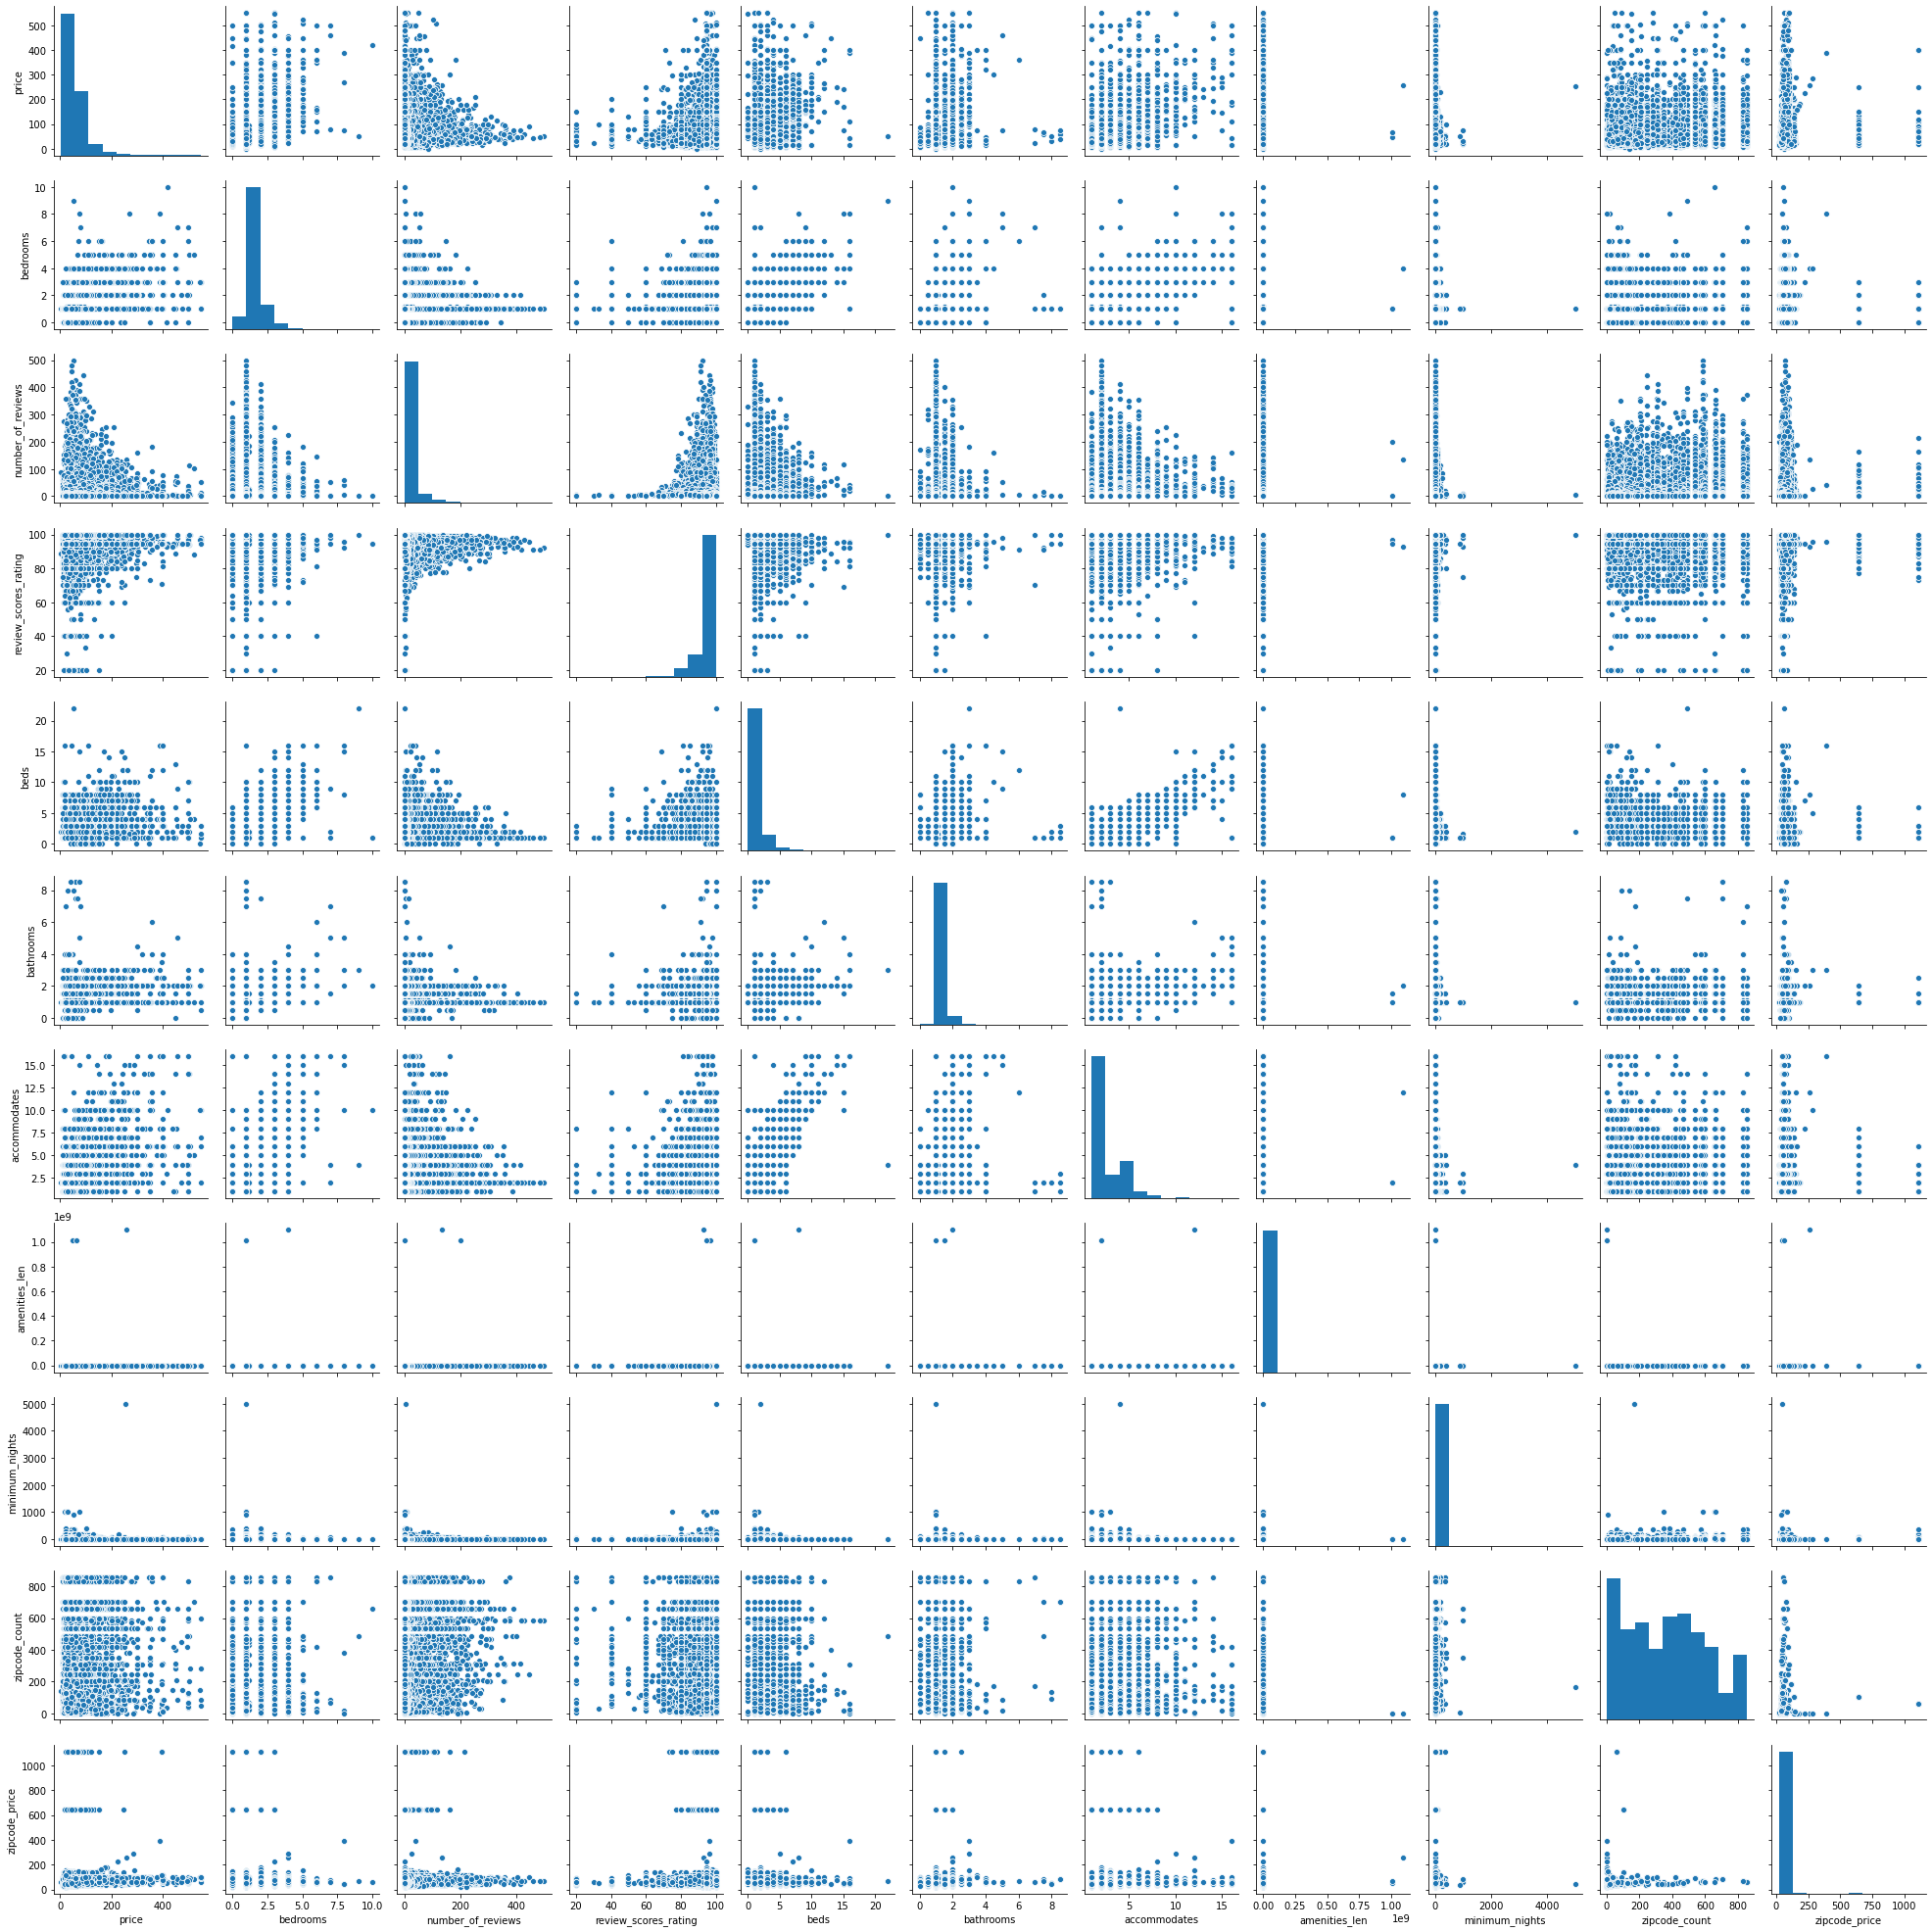

In [22]:
#cols = ['price', 'host_is_superhost', 'bedrooms', 'number_of_reviews', 'review_scores_rating']

set_of_data =[data, data2, data3]
set_of_city = ['berlin', 'monachium', 'praga']
sns.pairplot(data[cols], height=2.5)
plt.tight_layout()
plt.savefig('images/berlin_macierz_wykresow.png', dpi=300)
plt.show()

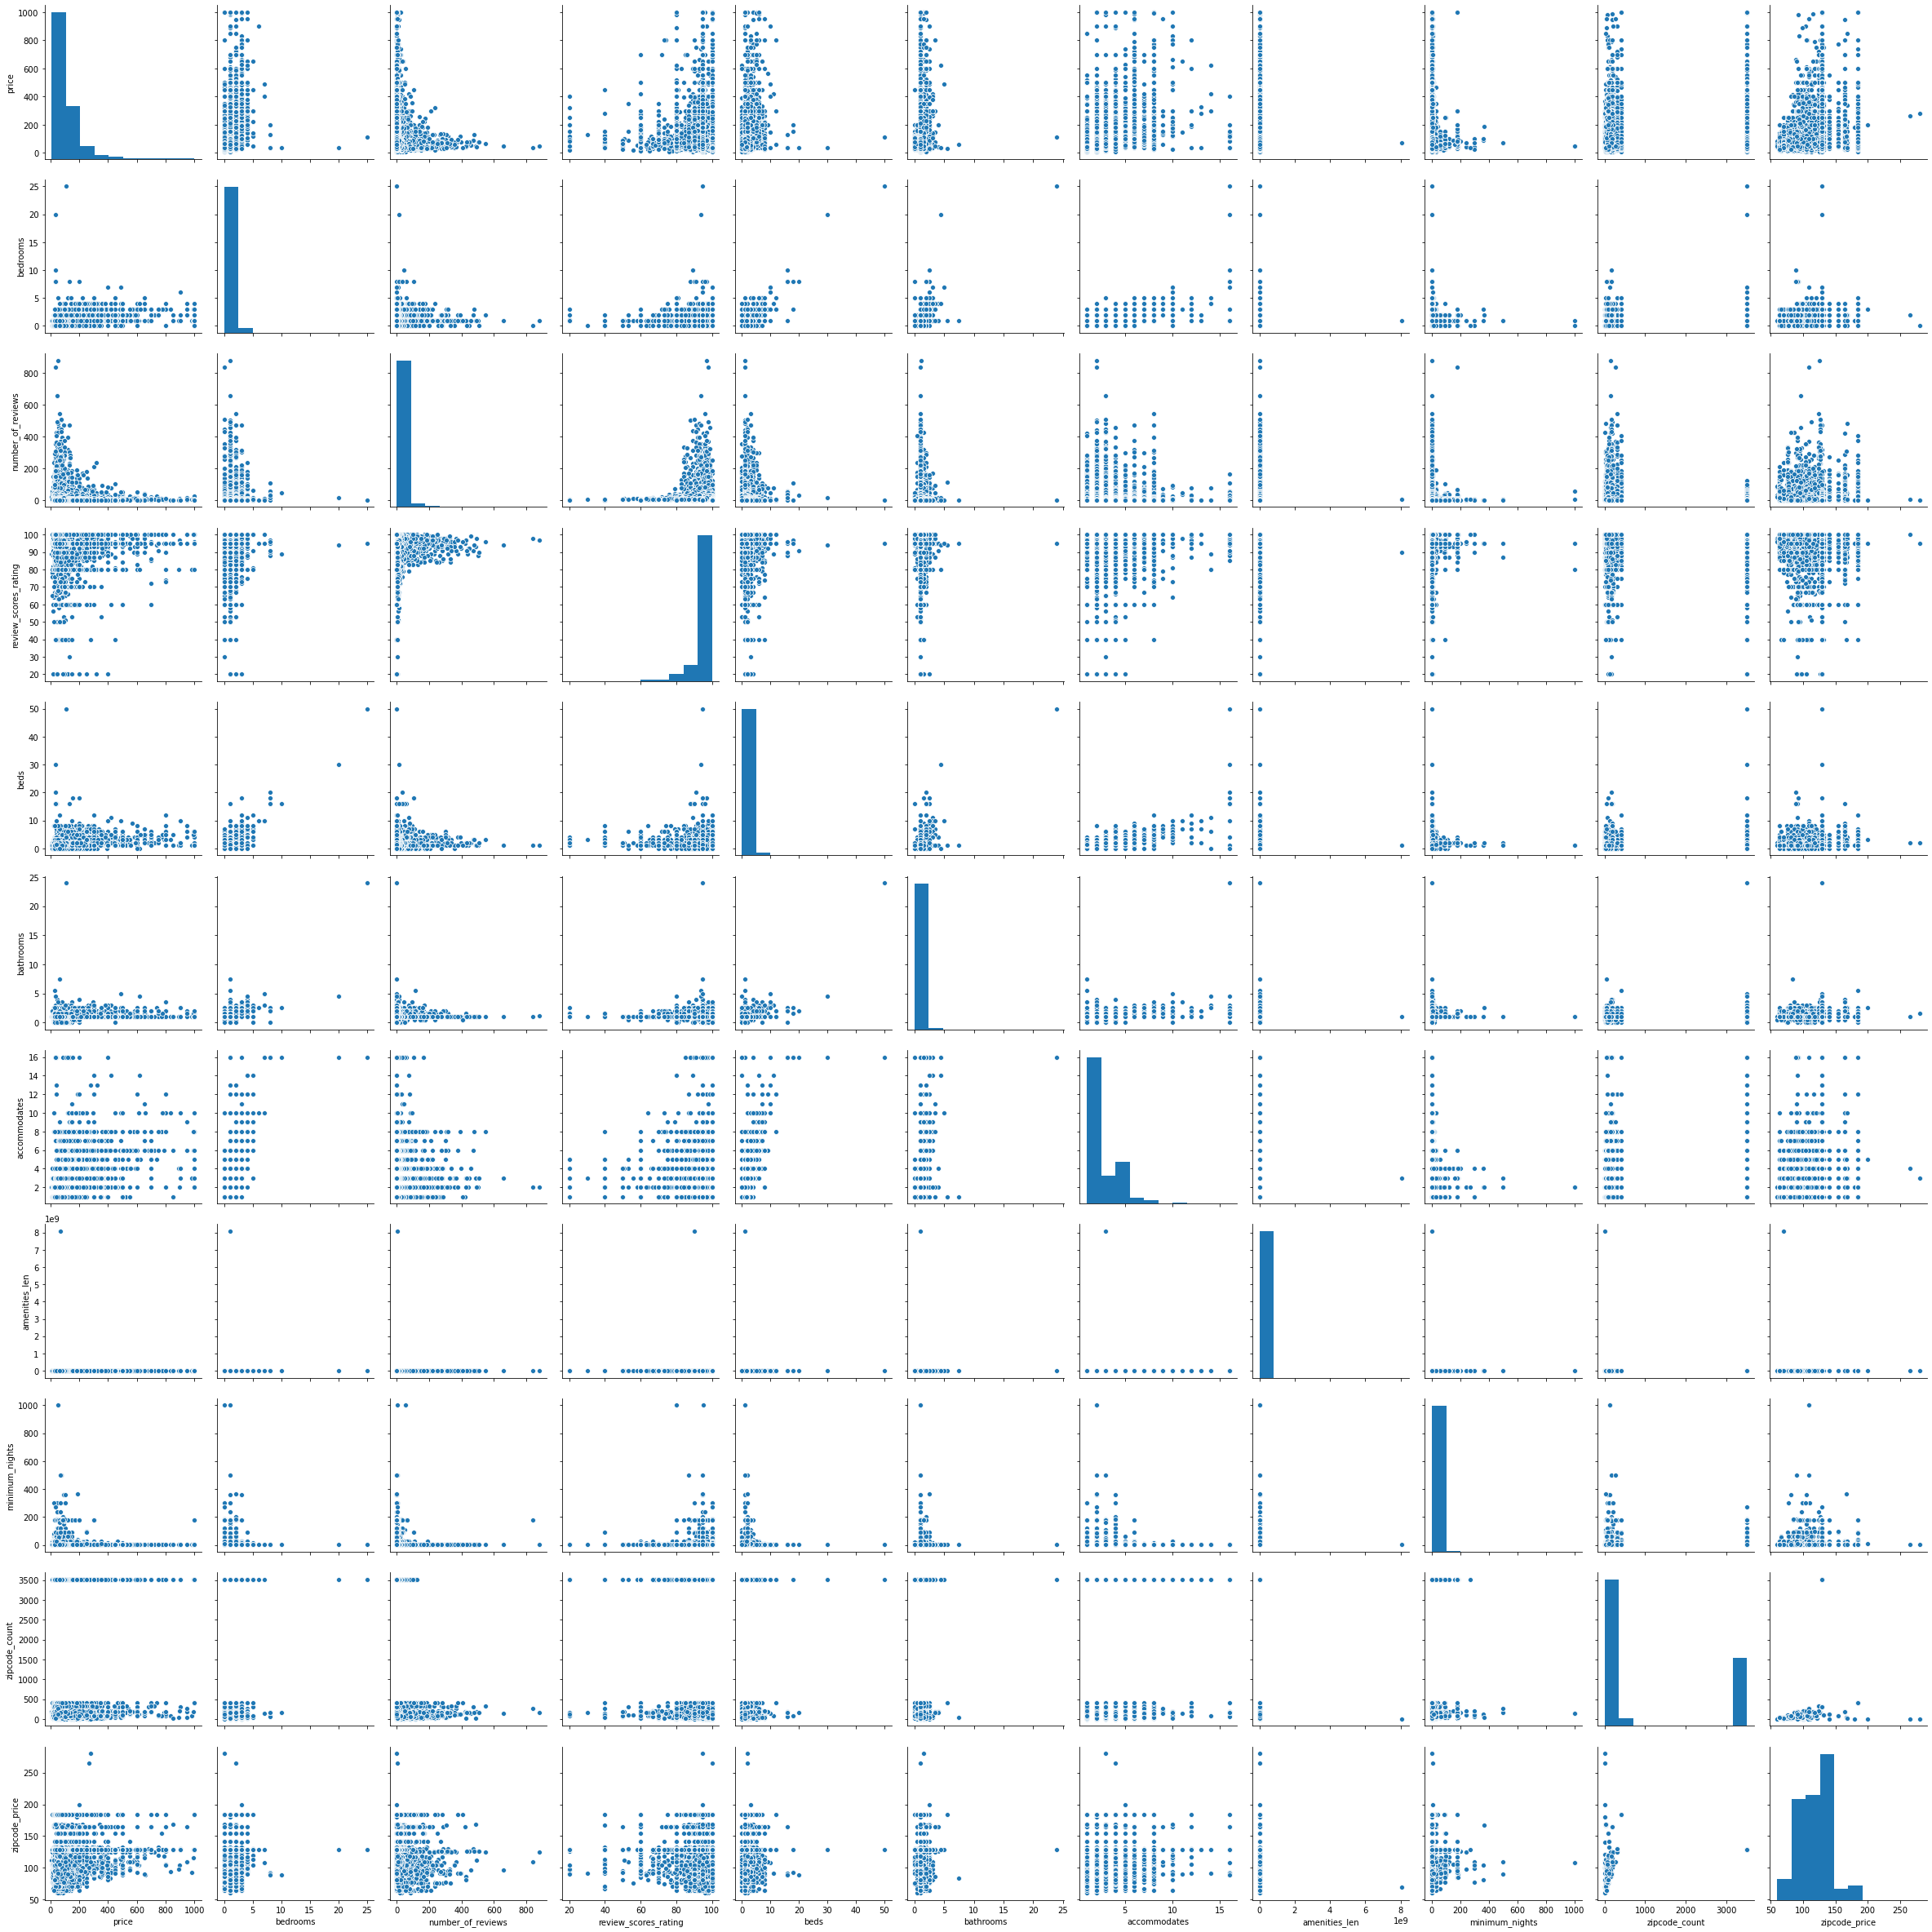

In [23]:
#cols = ['price', 'host_is_superhost', 'bedrooms', 'number_of_reviews', 'review_scores_rating']

sns.pairplot(data2[cols], height=3)
plt.tight_layout()
plt.savefig('images/monachium_macierz_wykresow.png', dpi=300)
plt.show()

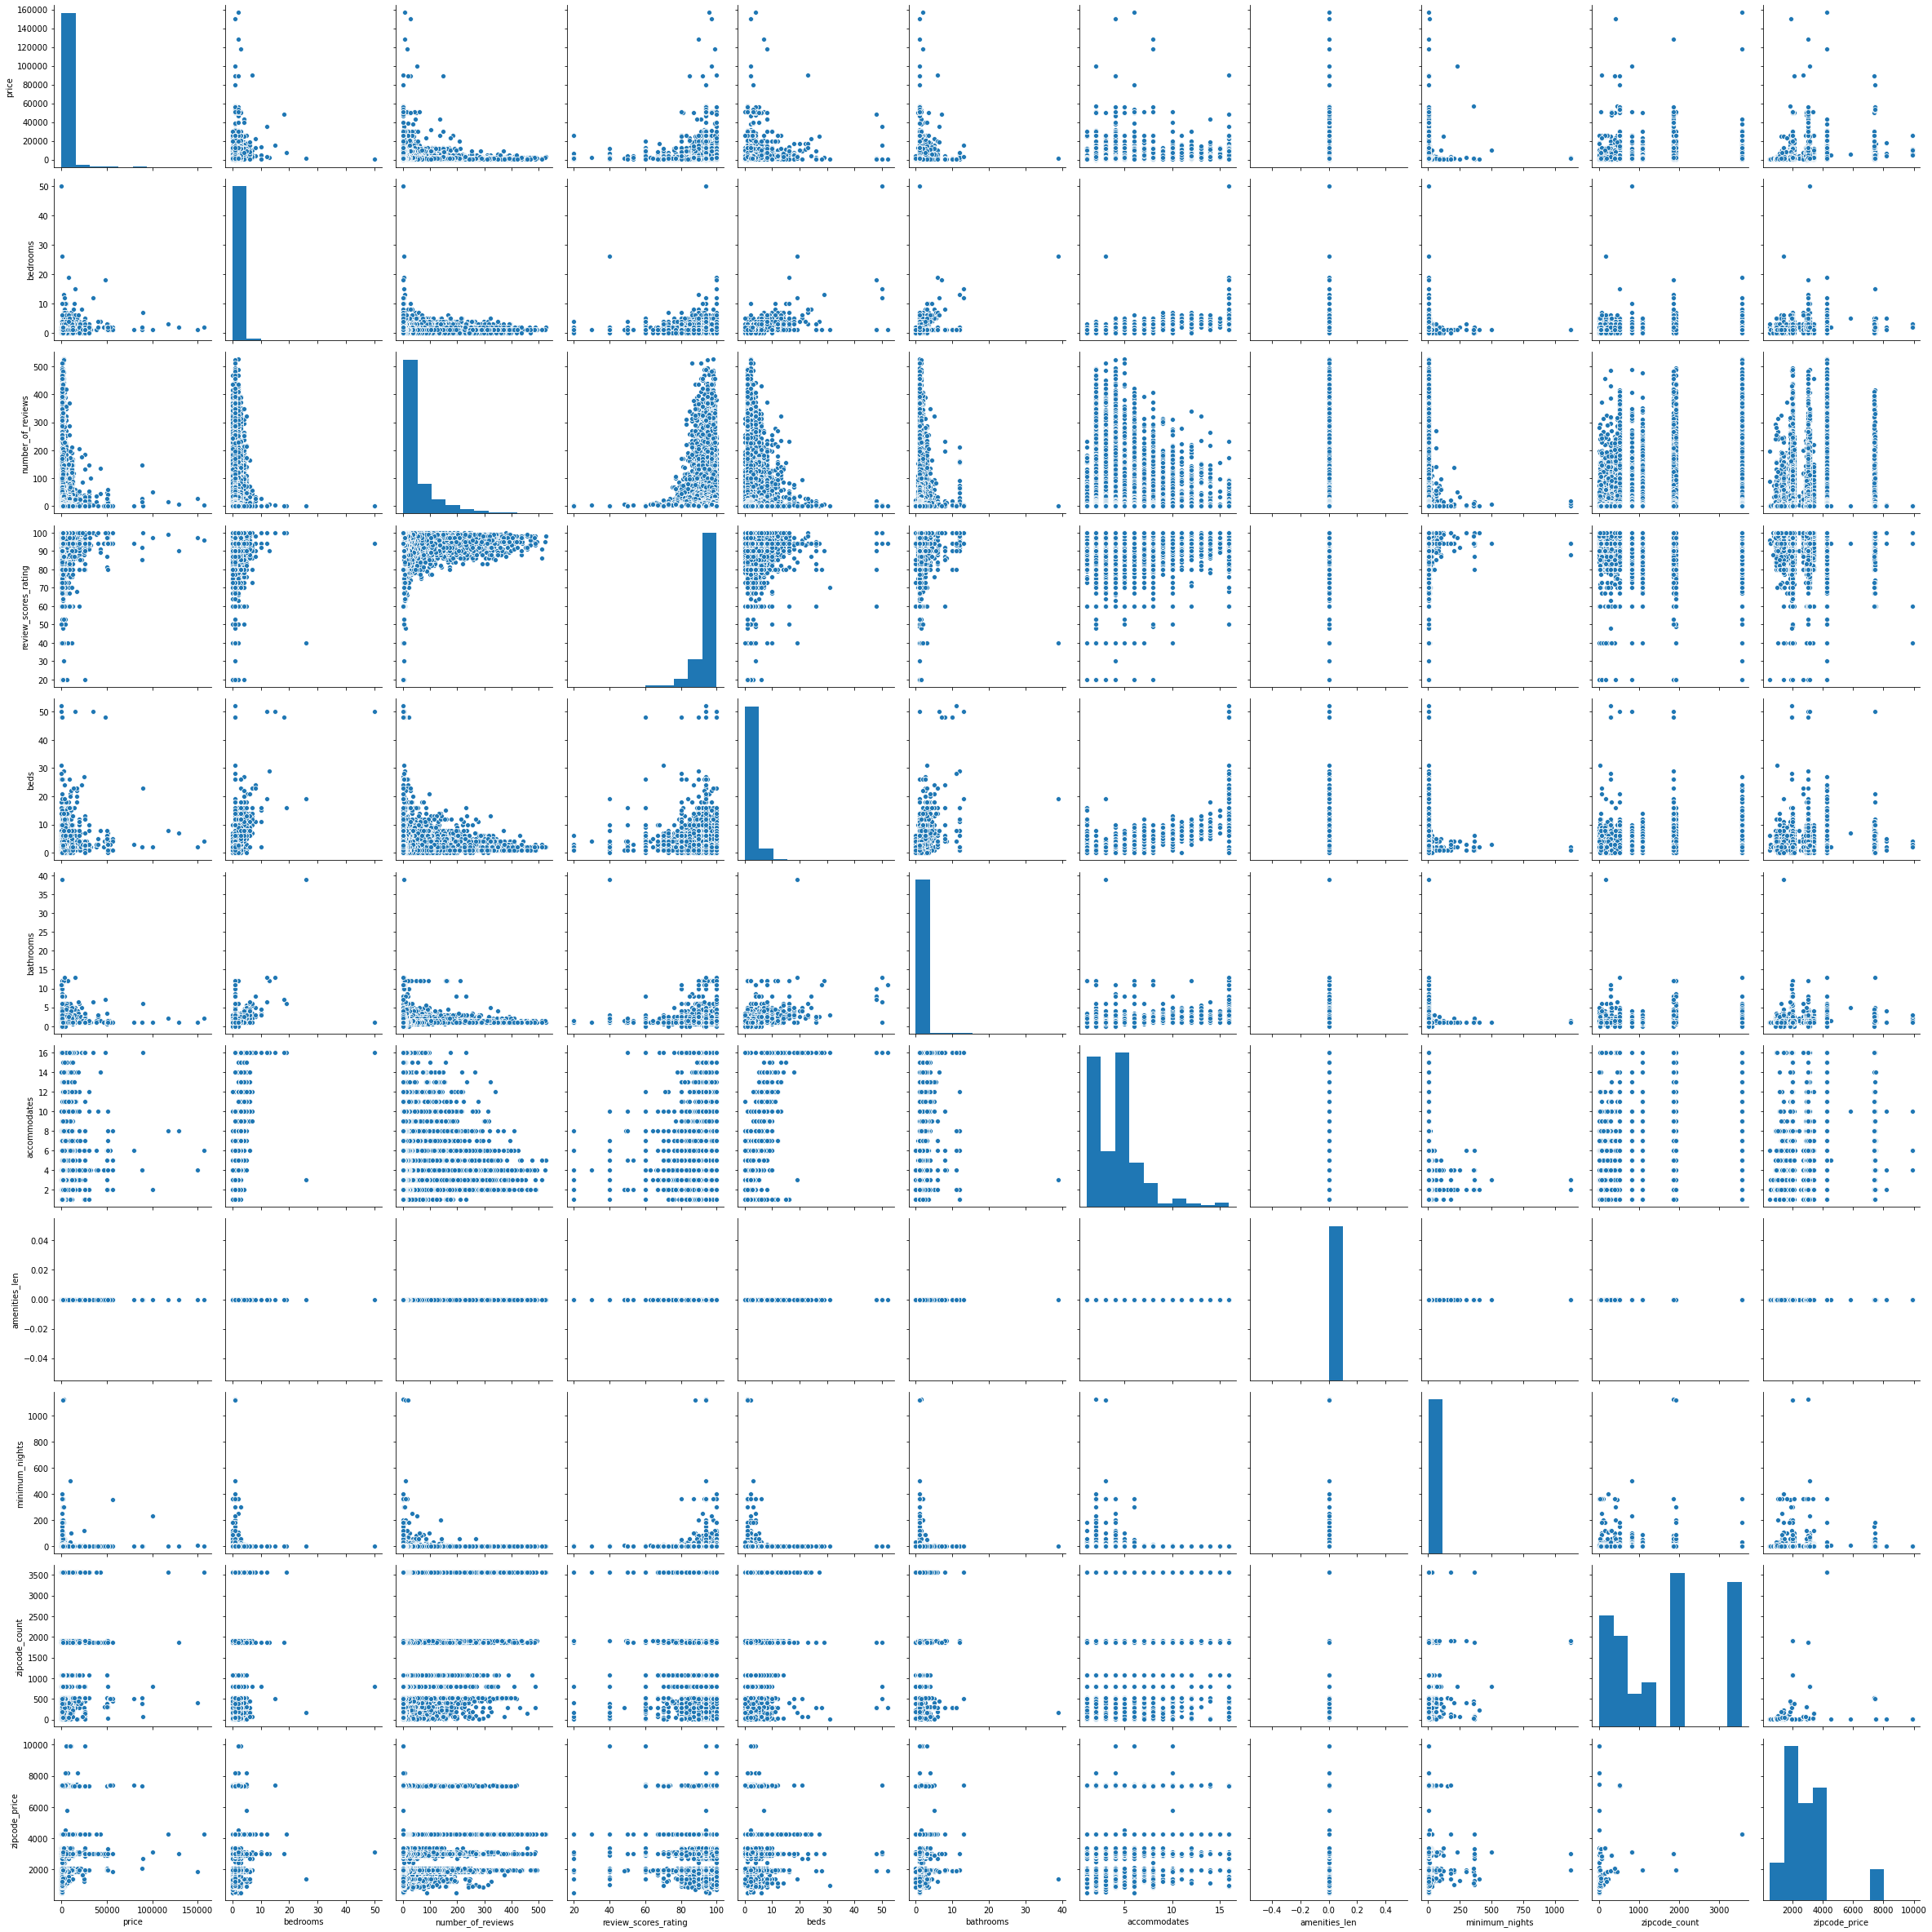

In [24]:
#cols = ['price', 'host_is_superhost', 'bedrooms', 'number_of_reviews', 'review_scores_rating']

sns.pairplot(data3[cols], height=3)
plt.tight_layout()
plt.savefig('images/praga_macierz_wykresow.png', dpi=300)
plt.show()

In [25]:
print(data[cols].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22479 entries, 0 to 22551
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 22479 non-null  float64
 1   host_is_superhost     22454 non-null  object 
 2   bedrooms              22479 non-null  float64
 3   number_of_reviews     22479 non-null  float64
 4   review_scores_rating  22479 non-null  float64
 5   beds                  22479 non-null  float64
 6   bathrooms             22479 non-null  float64
 7   accommodates          22479 non-null  float64
 8   amenities_len         22479 non-null  float64
 9   minimum_nights        22479 non-null  float64
 10  zipcode_count         22479 non-null  float64
 11  zipcode_price         22479 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.9+ MB
None


In [26]:
print(data[cols].describe())
print(data[cols].info())
data[cols].values.T
print(cols)
print(data[cols].info())
cols_for_heatmap = cols.copy()
cols_for_heatmap.remove('host_is_superhost')
#df = data[cols].replace({'host_is_superhost' : {'t' : 1, 'f' : 0}}, inplace=False)




              price      bedrooms  number_of_reviews  review_scores_rating  \
count  22479.000000  22479.000000       22479.000000          22479.000000   
mean      58.308021      1.158809          17.877619             94.414010   
std       45.678653      0.637756          36.814993              6.853521   
min        1.000000      0.000000           0.000000             20.000000   
25%       30.000000      1.000000           1.000000             93.000000   
50%       45.000000      1.000000           5.000000             95.000000   
75%       70.000000      1.000000          16.000000            100.000000   
max      550.000000     10.000000         498.000000            100.000000   

               beds     bathrooms  accommodates  amenities_len  \
count  22479.000000  22479.000000  22479.000000   2.247900e+04   
mean       1.617291      1.091371      2.631612   1.497655e+05   
std        1.161282      0.324717      1.489118   1.202406e+07   
min        0.000000      0.000000

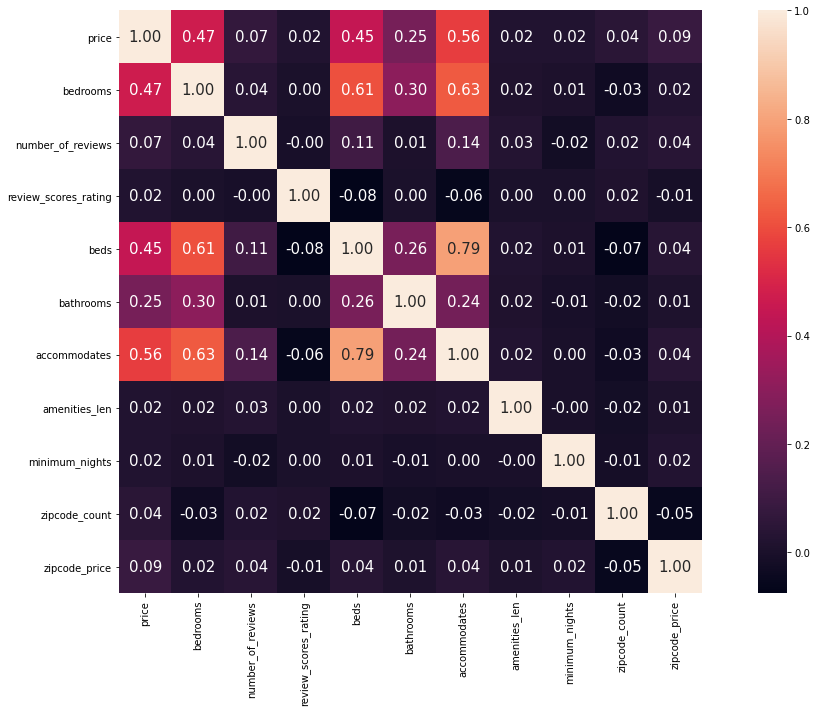

In [27]:
cm = np.corrcoef(data[cols_for_heatmap].values.T)
#sns.set(font_scale=1.5)
plt.figure(figsize = (16,10))
#fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols_for_heatmap,
                 xticklabels=cols_for_heatmap)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.savefig('images/berlin_heatmap.png', dpi=300)
plt.show()

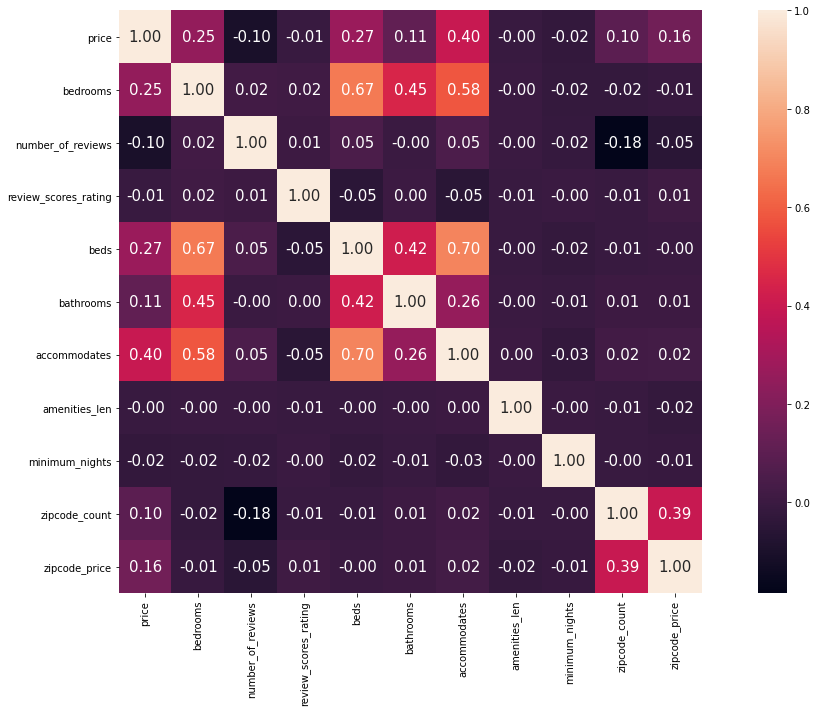

In [28]:
cm = np.corrcoef(data2[cols_for_heatmap].values.T)
#sns.set(font_scale=1.5)
plt.figure(figsize = (16,10))
#fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols_for_heatmap,
                 xticklabels=cols_for_heatmap)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.savefig('images/monachium_heatmap.png', dpi=300)
plt.show()

invalid value encountered in true_divide
invalid value encountered in true_divide


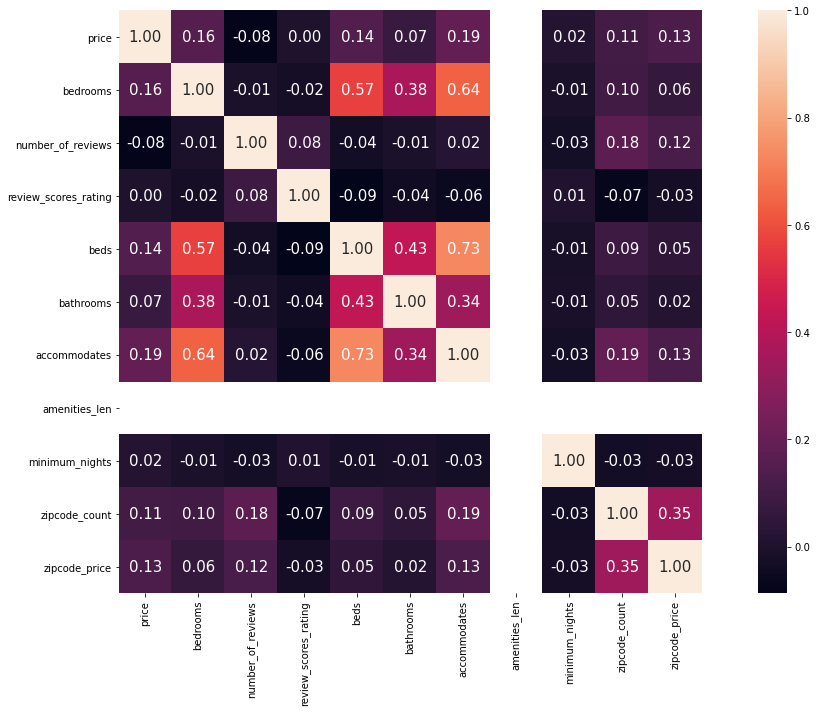

In [29]:
cm = np.corrcoef(data3[cols_for_heatmap].values.T)
#sns.set(font_scale=1.5)
plt.figure(figsize = (16,10))
#fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols_for_heatmap,
                 xticklabels=cols_for_heatmap)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.savefig('images/praga_heatmap.png', dpi=300)
plt.show()

# Estimating the coefficient of a regression model via scikit-learn 
z książki  300 str

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Modeling nonlinear relationships in the Housing Dataset
310 str

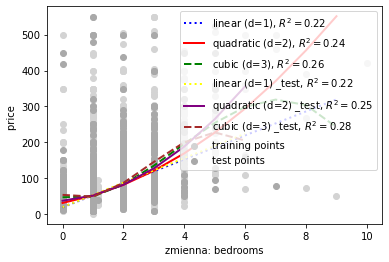

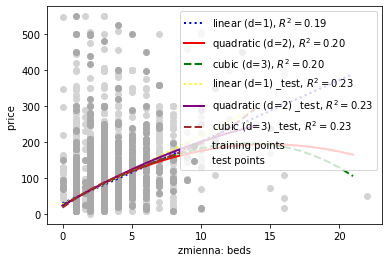

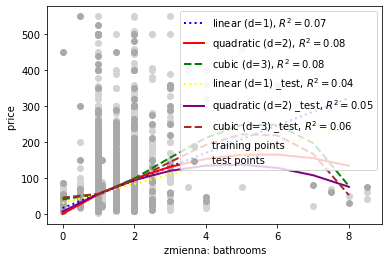

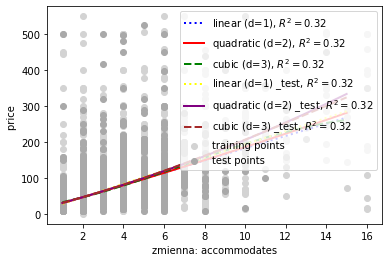

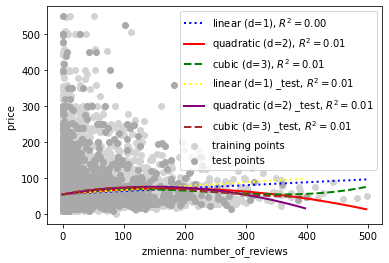

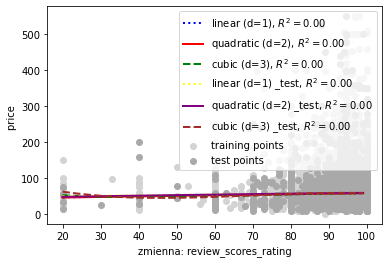

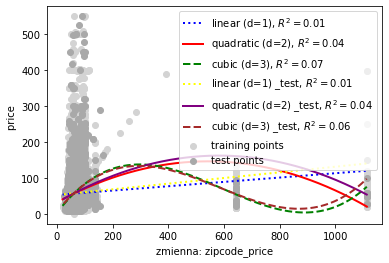

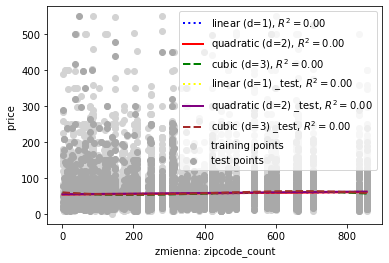

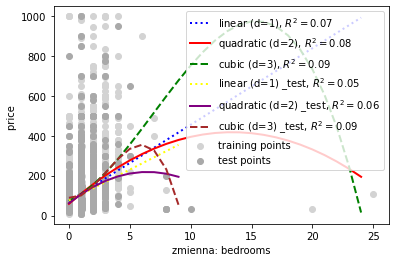

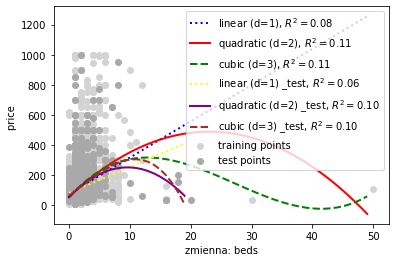

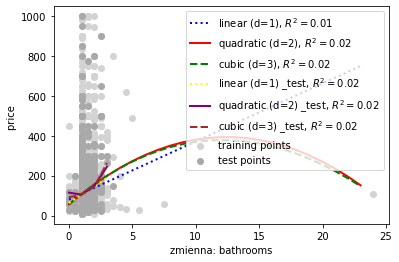

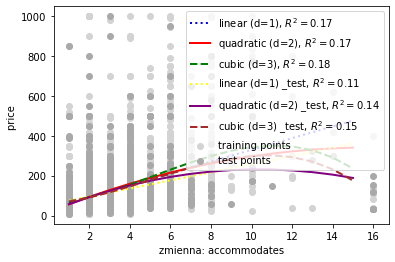

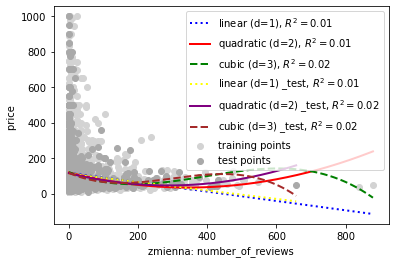

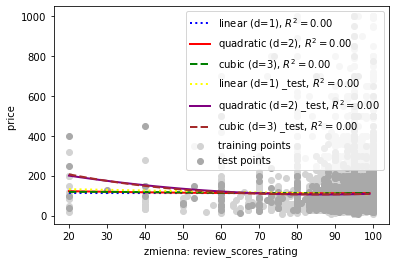

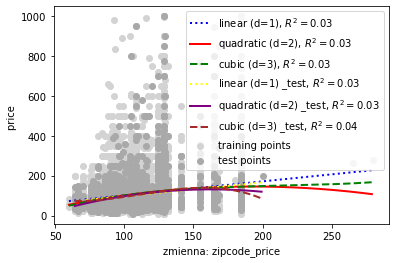

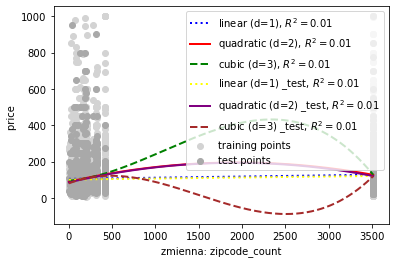

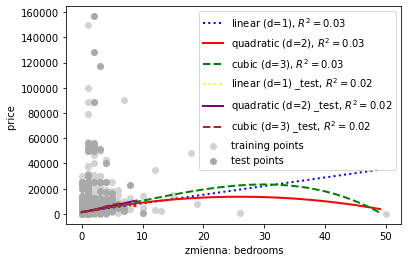

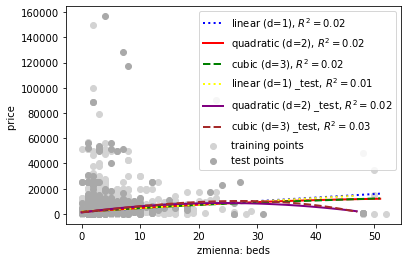

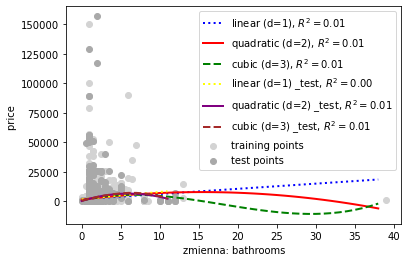

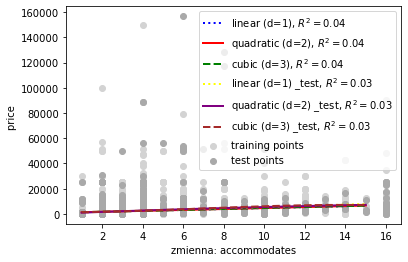

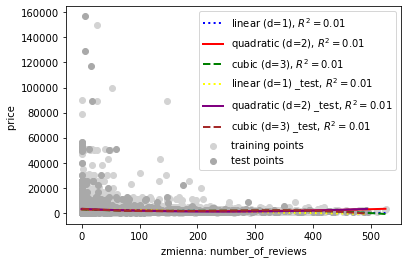

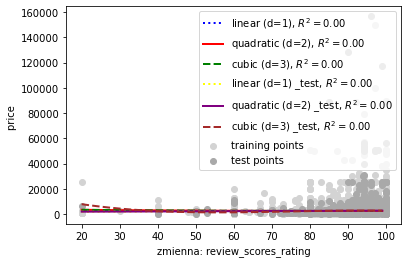

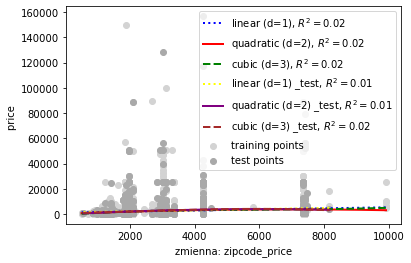

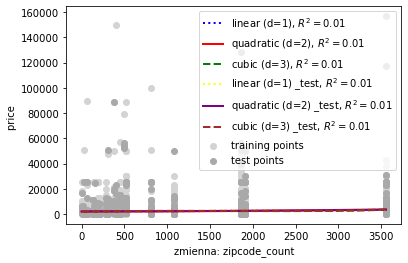

    cubic_mse_test  cubic_mse_train  cubic_r2_test  cubic_r2_train       data  \
0     1.609698e+03     1.509888e+03          0.280           0.263     berlin   
1     1.719490e+03     1.642957e+03          0.231           0.198     berlin   
2     2.102707e+03     1.877084e+03          0.060           0.084     berlin   
3     1.510194e+03     1.396725e+03          0.325           0.318     berlin   
4     2.208443e+03     2.032539e+03          0.013           0.008     berlin   
5     2.235045e+03     2.047468e+03          0.001           0.001     berlin   
6     2.091493e+03     1.900925e+03          0.065           0.072     berlin   
7     2.227109e+03     2.040034e+03          0.004           0.004     berlin   
8     8.047125e+03     9.661068e+03          0.088           0.091  monachium   
9     7.959417e+03     9.475409e+03          0.098           0.109  monachium   
10    8.648659e+03     1.042127e+04          0.020           0.020  monachium   
11    7.457556e+03     8.688

In [31]:
results = pd.DataFrame()
#results =results.append(['zm2', 1.0, 2.0, 3.0], ignore_index=True)
#results.append(['zm3', 1.0, 2.0, 3.0])

cols = [ 'bedrooms', 'beds', 'bathrooms', 'accommodates', 'number_of_reviews','review_scores_rating', 'zipcode_price', 'zipcode_count']

set_of_data =[data, data2,data3]
set_of_city = ['berlin', 'monachium', 'praga']
city = 'berlin'
j_index = 0
i_index =0
for j in set_of_data:
    for i in cols:
        X = j[[i]].values
        y = j['price'].values
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        regr = LinearRegression()

        # create quadratic features
        quadratic = PolynomialFeatures(degree=2)
        cubic = PolynomialFeatures(degree=3)
        X_quad_train = quadratic.fit_transform(X_train)
        X_cubic_train = cubic.fit_transform(X_train)

        quadratic = PolynomialFeatures(degree=2)
        cubic = PolynomialFeatures(degree=3)
        X_quad_test = quadratic.fit_transform(X_test)
        X_cubic_test = cubic.fit_transform(X_test)


        # fit features
        X_fit_train = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
        X_fit_test = np.arange(X_test.min(), X_test.max(), 1)[:, np.newaxis]


        regr = regr.fit(X_train, y_train)
        y_lin_fit_train = regr.predict(X_fit_train)
        y_train_pred = regr.predict(X_train)
        linear_r2_train = r2_score(y_train, y_train_pred)
        linear_mse_train =  mean_squared_error(y_train, y_train_pred)

        regr = regr.fit(X_test, y_test)
        y_lin_fit_test = regr.predict(X_fit_test)
        y_test_pred = regr.predict(X_test)
        linear_r2_test = r2_score(y_test, y_test_pred)
        linear_mse_test = mean_squared_error(y_test, y_test_pred)


        regr = regr.fit(X_quad_train, y_train)
        y_quad_fit_train = regr.predict(quadratic.fit_transform(X_fit_train))
        y_train_pred = regr.predict(X_quad_train)
        quadratic_r2_train = r2_score(y_train, y_train_pred)
        quadratic_mse_train = mean_squared_error(y_train, y_train_pred)

        regr = regr.fit(X_quad_test, y_test)
        y_quad_fit_test = regr.predict(quadratic.fit_transform(X_fit_test))
        y_test_pred = regr.predict(X_quad_test)
        quadratic_r2_test = r2_score(y_test, y_test_pred)
        quadratic_mse_test = mean_squared_error(y_test, y_test_pred)

        regr = regr.fit(X_cubic_train, y_train)
        y_cubic_fit_train = regr.predict(cubic.fit_transform(X_fit_train))
        y_train_pred = regr.predict(X_cubic_train)
        cubic_r2_train = r2_score(y_train, y_train_pred)
        cubic_mse_train = mean_squared_error(y_train, y_train_pred)

        regr = regr.fit(X_cubic_test, y_test)
        y_cubic_fit_test = regr.predict(cubic.fit_transform(X_fit_test))
        y_test_pred = regr.predict(X_cubic_test)
        cubic_r2_test = r2_score(y_test, y_test_pred)
        cubic_mse_test = mean_squared_error(y_test, y_test_pred)


        # plot results
        plt.scatter(X_train, y_train, label='training points', color='lightgray')
        plt.scatter(X_test, y_test, label='test points', color='darkgray')

        plt.plot(X_fit_train, y_lin_fit_train, 
                 label='linear (d=1), $R^2=%.2f$' % linear_r2_train, 
                 color='blue', 
                 lw=2, 
                 linestyle=':')

        plt.plot(X_fit_train, y_quad_fit_train, 
                 label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2_train,
                 color='red', 
                 lw=2,
                 linestyle='-')

        plt.plot(X_fit_train, y_cubic_fit_train, 
                 label='cubic (d=3), $R^2=%.2f$' % cubic_r2_train,
                 color='green', 
                 lw=2, 
                 linestyle='--')

        plt.plot(X_fit_test, y_lin_fit_test, 
                 label='linear (d=1) _test, $R^2=%.2f$' % linear_r2_test, 
                 color='yellow', 
                 lw=2, 
                 linestyle=':')

        plt.plot(X_fit_test, y_quad_fit_test, 
                 label='quadratic (d=2) _test, $R^2=%.2f$' % quadratic_r2_test,
                 color='purple', 
                 lw=2,
                 linestyle='-')

        plt.plot(X_fit_test, y_cubic_fit_test, 
                 label='cubic (d=3) _test, $R^2=%.2f$' % cubic_r2_test,
                 color='brown', 
                 lw=2, 
                 linestyle='--')

        plt.xlabel('zmienna: ' + i)
        plt.ylabel('price ')
        plt.legend(loc='upper right')

        plt.figsize = (50,50)
        plt.title = "test_title"
        #plt.annotate(ha='center', va='bottom', xy=(0,0), size =15)

        #plt.ylim([25.0, 300])
        #plt.figure(figsize=(30,30))

        #plt.savefig('images/10_11.png', dpi=300)
        new_row_train = {'zmienna':i, 'data': set_of_city[j_index],
                         'linear_r2_train':round(linear_r2_train, 3), 'quadratic_r2_train':round(quadratic_r2_train, 3), 'cubic_r2_train':round(cubic_r2_train, 3),
                          'linear_mse_train':round(linear_mse_train, 3), 'quadratic_mse_train':round(quadratic_mse_train, 3), 'cubic_mse_train':round(cubic_mse_train, 3),
                         'linear_r2_test':round(linear_r2_test, 3), 'quadratic_r2_test':round(quadratic_r2_test, 3), 'cubic_r2_test':round(cubic_r2_test, 3),
                          'linear_mse_test':round(linear_mse_test, 3), 'quadratic_mse_test':round(quadratic_mse_test, 3), 'cubic_mse_test':round(cubic_mse_test, 3)
                        }

        #new_row_test= {'zmienna':i, 'linear_r2':round(linear_r2_test, 3), 'quadratic_r2':round(quadratic_r2_test, 3), 'cubic_r2':round(cubic_r2_test, 3), 'data':'_test'}

        #print(new_row)
        results= results.append(new_row_train, ignore_index=True)
        #results= results.append(new_row_test, ignore_index=True)
        plt.savefig(f'images/{set_of_city[j_index]}_{i_index}_{i}.png', dpi=300)
        plt.show()
        i_index += 1
    j_index += 1
    i_index = 0
print(results)

In [32]:
data.replace({'host_is_superhost' : {'t' : True, 'f' : False}}, inplace=True)
data2.replace({'host_is_superhost' : {'t' : True, 'f' : False}}, inplace=True)
data3.replace({'host_is_superhost' : {'t' : True, 'f' : False}}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
str = 'bedrooms + beds + bathrooms + accommodates  + number_of_reviews + review_scores_rating + zipcode_price'
s1_1 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews + review_scores_rating'
s1_2 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews'
s1_3 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price'
s1_4 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count'
s1_5 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms'
s1_6 = 'host_is_superhost + accommodates + bedrooms + beds'
s1_7 = 'host_is_superhost + accommodates + bedrooms'
s1_8 = 'host_is_superhost + accommodates'
s1_9 = 'host_is_superhost'

s2_1 = 'accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews + review_scores_rating'
s2_2 = 'accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews'
s2_3 = 'accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price'
s2_4 = 'accommodates + bedrooms + beds + bathrooms + zipcode_count'
s2_5 = 'accommodates + bedrooms + beds + bathrooms'
s2_6 = 'accommodates + bedrooms + beds'
s2_7 = 'accommodates + bedrooms'
s2_8 = 'accommodates'

s1_1 = 'host_is_superhost  bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews + review_scores_rating'
s1_2 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews'
s1_3 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price'
s1_4 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count'
s1_5 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms'
s1_6 = 'host_is_superhost + accommodates + bedrooms + beds'
s1_7 = 'host_is_superhost + accommodates + bedrooms'
s1_8 = 'host_is_superhost + accommodates'
s1_9 = 'host_is_superhost'

s1 = 'host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews + review_scores_rating'
s2 = 'accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews + review_scores_rating'
s3 = 'accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price'
s3 = 'accommodates + bedrooms + beds + bathrooms + zipcode_price'
s4 = 'accommodates + bedrooms + beds'
s5 = 'accommodates + bedrooms'
s6 = 'bedrooms + beds'
s7 = 'accommodates + beds'
s8 = 'accommodates + zipcode_price'
s9 = 'accommodates + beds + zipcode_price'

tab = [s1, s2, s3, s4, s5, s6, s7, s8, s9]
print(tab)

tab2 = ['accommodates','bedrooms','beds','bathrooms','zipcode_count','zipcode_price','host_is_superhost','number_of_reviews','review_scores_rating']

        
        
        

    

['host_is_superhost + accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews + review_scores_rating', 'accommodates + bedrooms + beds + bathrooms + zipcode_count + zipcode_price + number_of_reviews + review_scores_rating', 'accommodates + bedrooms + beds + bathrooms + zipcode_price', 'accommodates + bedrooms + beds', 'accommodates + bedrooms', 'bedrooms + beds', 'accommodates + beds', 'accommodates + zipcode_price', 'accommodates + beds + zipcode_price']


In [35]:
#'host_is_superhost + 
with open("Output.txt", "w") as text_file:
    print(f"start", file=text_file)
            
set_of_data =[data, data2,data3]
set_of_city = ['berlin', 'monachium', 'praga']
city = 'berlin'
j_index = 0
i_index =1
for j in set_of_data:
    for i in tab:
        model = smf.ols('price ~ ' + i, data=j).fit()
        wynik = model.summary()
        print(wynik)
        with open("Output.txt", "a") as text_file:
            print(f"###############miasto: {set_of_city[j_index]}", file=text_file)
            print(f"$$$$$$$$$ciąg zmiennych nr:{i_index} {i}", file=text_file)
            print(f"{wynik}", file=text_file)
            print("\n\n")
            
        i_index += 1 
    j_index += 1

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     1412.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:53:20   Log-Likelihood:            -1.1264e+05
No. Observations:               22454   AIC:                         2.253e+05
Df Residuals:                   22444   BIC:                         2.254e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     5227.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:53:20   Log-Likelihood:            -1.1351e+05
No. Observations:               22479   AIC:                         2.270e+05
Df Residuals:                   22476   BIC:                         2.270e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     1066.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:53:21   Log-Likelihood:                -68176.
No. Observations:               11454   AIC:                         1.364e+05
Df Residuals:                   11451   BIC:                         1.364e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       39.4761      1.793     22.016  

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     210.3
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.05e-90
Time:                        11:53:21   Log-Likelihood:            -1.4028e+05
No. Observations:               14141   AIC:                         2.806e+05
Df Residuals:                   14138   BIC:                         2.806e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Pass eps=5e-05 as keyword args. From version 0.25 passing these as positional arguments will result in an error


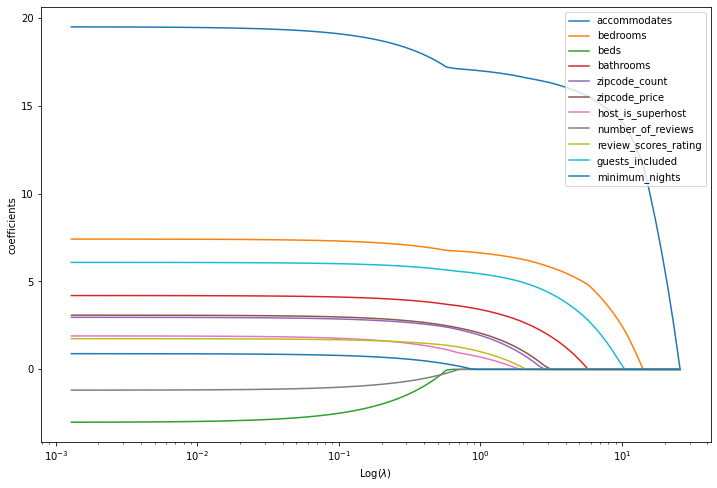

In [37]:
variables = ['accommodates','bedrooms','beds','bathrooms','zipcode_count','zipcode_price','host_is_superhost','number_of_reviews','review_scores_rating', 'guests_included', 'minimum_nights']
 
    
data_subset = data.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)

X = data_subset.loc[:,variables]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, 5e-5, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
#plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

plt.savefig('images/berlin_lasso.png', dpi=300)

Pass eps=5e-05 as keyword args. From version 0.25 passing these as positional arguments will result in an error


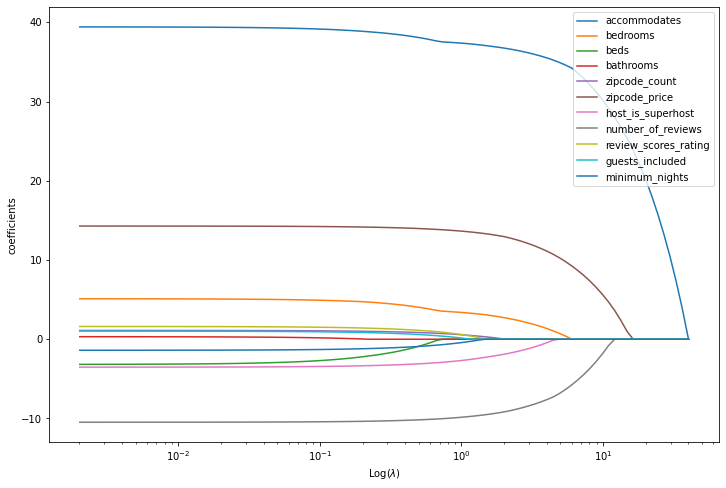

In [38]:
variables = ['accommodates','bedrooms','beds','bathrooms','zipcode_count','zipcode_price','host_is_superhost','number_of_reviews','review_scores_rating', 'guests_included', 'minimum_nights']
 
    
data_subset = data2.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)

X = data_subset.loc[:,variables]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, 5e-5, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
#plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

plt.savefig('images/monachium_lasso.png', dpi=300)

Pass eps=5e-05 as keyword args. From version 0.25 passing these as positional arguments will result in an error


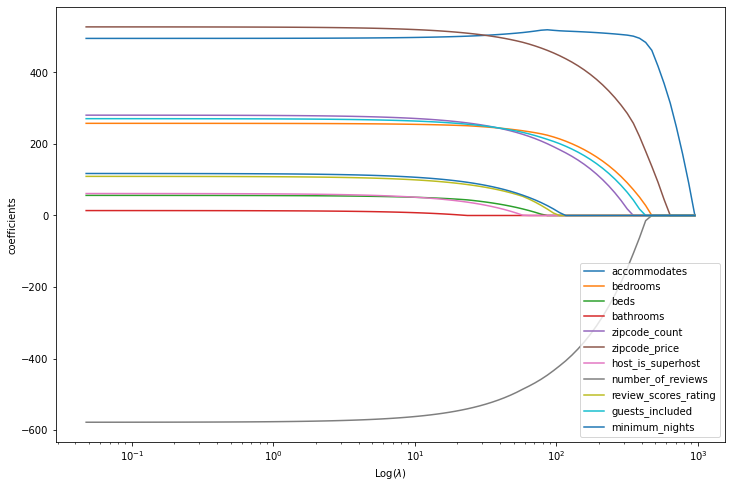

In [39]:
variables = ['accommodates','bedrooms','beds','bathrooms','zipcode_count','zipcode_price','host_is_superhost','number_of_reviews','review_scores_rating', 'guests_included', 'minimum_nights']
 
    
data_subset = data3.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)

X = data_subset.loc[:,variables]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, 5e-5, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
#plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

plt.savefig('images/praga_lasso.png', dpi=300)

In [40]:
# XGBoost
# 'guests_included',
variables = ['bathrooms', 'bedrooms', 'beds',  'minimum_nights', 'number_of_reviews', 'review_scores_rating']
variables = cols
variables = ['accommodates','bedrooms','beds','bathrooms','zipcode_count','zipcode_price','number_of_reviews','review_scores_rating', 'guests_included', 'minimum_nights']
 
    
data_subset = data.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)
data_subset = data_subset.iloc[:1000,:]

X = data_subset.loc[:,variables]
#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that
y = np.array(data_subset.price)

model = xgboost.XGBRegressor(n_estimators=10)
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
# XGBoost
# 'guests_included',
variables = ['bathrooms', 'bedrooms', 'beds',  'minimum_nights', 'number_of_reviews', 'review_scores_rating']
variables = cols
variables = ['accommodates','bedrooms','beds','bathrooms','zipcode_count','zipcode_price','number_of_reviews','review_scores_rating', 'guests_included', 'minimum_nights']
 
    
data_subset = data2.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)
data_subset = data_subset.iloc[:1000,:]

X2 = data_subset.loc[:,variables]
#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that
y2 = np.array(data_subset.price)

model2 = xgboost.XGBRegressor(n_estimators=10)
model2.fit(X2, y2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
# XGBoost
# 'guests_included',
variables = ['bathrooms', 'bedrooms', 'beds',  'minimum_nights', 'number_of_reviews', 'review_scores_rating']
variables = cols
variables = ['accommodates','bedrooms','beds','bathrooms','zipcode_count','zipcode_price','number_of_reviews','review_scores_rating', 'guests_included', 'minimum_nights']
 
    
data_subset = data3.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)
data_subset = data_subset.iloc[:1000,:]

X3 = data_subset.loc[:,variables]
#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that
y3 = np.array(data_subset.price)

model3 = xgboost.XGBRegressor(n_estimators=10)
model3.fit(X3, y3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
predicted = model.predict(X)
mean_squared_error(y, predicted)
#What does it even mean? Todo: check different error functions and how they can be explained
#Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

339.44469264554095

In [44]:
predicted2 = model2.predict(X)
mean_squared_error(y2, predicted2)
#What does it even mean? Todo: check different error functions and how they can be explained
#Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

9434.294759701825

In [45]:
predicted3 = model3.predict(X)
mean_squared_error(y3, predicted3)

9271619.38279965

In [46]:
#Playing with Shapley values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
X.iloc[0,:]

accommodates              3.0
bedrooms                  1.0
beds                      2.0
bathrooms                 1.0
zipcode_count           538.0
zipcode_price            88.5
number_of_reviews       118.0
review_scores_rating     93.0
guests_included           1.0
minimum_nights            4.0
Name: 0, dtype: float64

In [47]:
#Playing with Shapley values
explainer2 = shap.TreeExplainer(model2)
shap_values2 = explainer2.shap_values(X2)
X2.iloc[0,:]

accommodates              2.000000
bedrooms                  1.000000
beds                      1.000000
bathrooms                 1.000000
zipcode_count           417.000000
zipcode_price           184.453237
number_of_reviews        25.000000
review_scores_rating     98.000000
guests_included           1.000000
minimum_nights            2.000000
Name: 0, dtype: float64

In [48]:
#Playing with Shapley values
explainer3 = shap.TreeExplainer(model3)
shap_values3 = explainer3.shap_values(X3)
X3.iloc[0,:]

accommodates               4.000000
bedrooms                   1.000000
beds                       2.000000
bathrooms                  1.000000
zipcode_count           3558.000000
zipcode_price           4262.658797
number_of_reviews         19.000000
review_scores_rating      98.000000
guests_included            2.000000
minimum_nights             1.000000
Name: 0, dtype: float64

In [49]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])


In [50]:
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values2[0,:], X2.iloc[0,:])

In [51]:
shap.initjs()
shap.force_plot(explainer3.expected_value, shap_values3[0,:], X3.iloc[0,:])

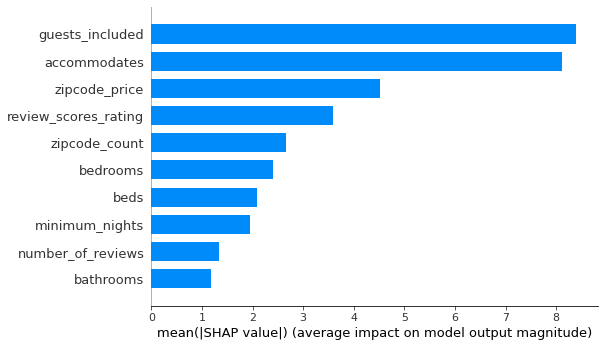

In [52]:
shap.summary_plot(shap_values, X, plot_type="bar")

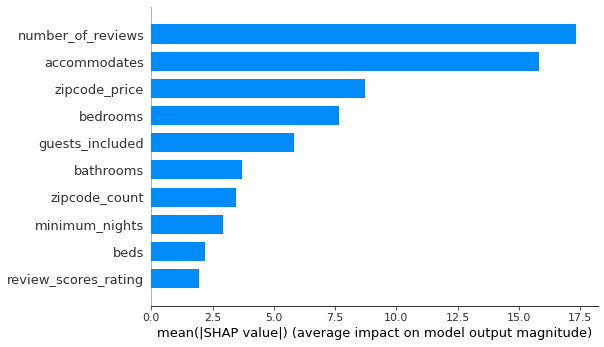

In [53]:
shap.summary_plot(shap_values2, X2, plot_type="bar")

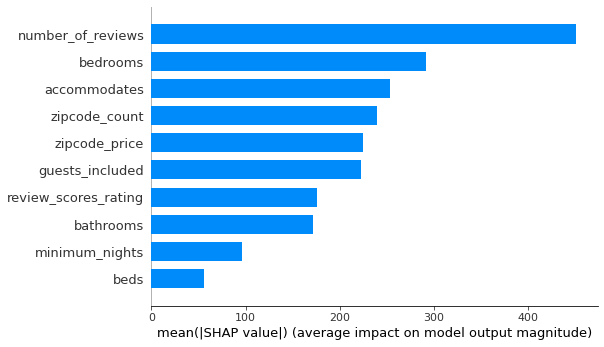

In [54]:
shap.summary_plot(shap_values3, X3, plot_type="bar")

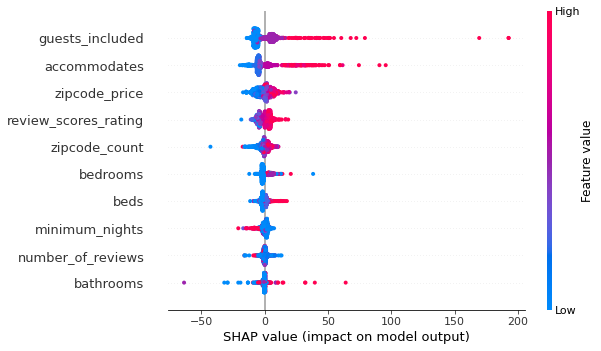

In [55]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

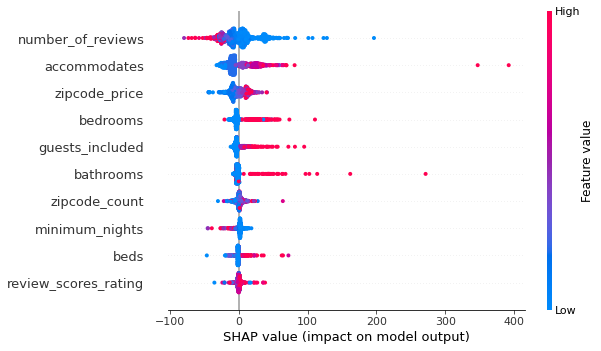

In [56]:
shap.summary_plot(shap_values2, features=X2, feature_names=X2.columns)

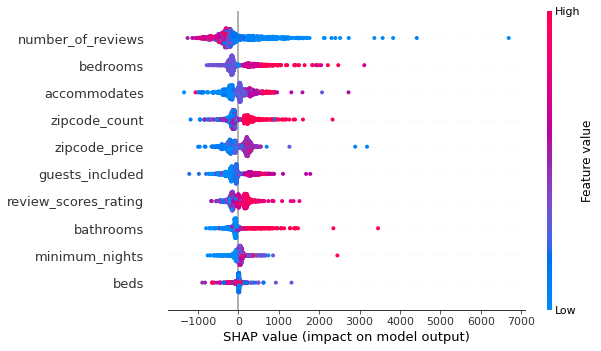

In [57]:
shap.summary_plot(shap_values3, features=X3, feature_names=X3.columns)

In [58]:
data.guests_included.describe()

count    22479.000000
mean         1.330041
std          0.827136
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: guests_included, dtype: float64

In [59]:
data2.guests_included.describe()

count    11454.000000
mean         1.376113
std          3.309518
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        200.000000
Name: guests_included, dtype: float64

In [ ]:
#Sources:
#https://www.kaggle.com/yaowenling/berlin-airbnb-data-exploration-public
#https://xavierbourretsicotte.github.io/lasso_implementation.html